# Sandra Otubushin: Exploratory Data Analysis Project

**Course:** Intro to Jupyter in VS Code  
**Goal:** Practice Markdown and Python cells, verify notebook runs cleanly.  
**Notes:** This notebook was executed successfully on my machine.


In [1]:
import matplotlib.pyplot as plt


In [2]:
import sys
import pandas as pd

print("Starting out with Jupyter.")
print("Python executable:", sys.executable)
print("Python version:", sys.version)

pd.DataFrame({"a": [1, 2, 3], "b": [9, 8, 7]})


Starting out with Jupyter.
Python executable: c:\Users\larry\Documents\Sandra-eda-notebook\.venv\Scripts\python.exe
Python version: 3.13.7 (tags/v3.13.7:bcee1c3, Aug 14 2025, 14:15:11) [MSC v.1944 64 bit (AMD64)]


,a,b
0,1,9
1,2,8
2,3,7


## Step 2. Load Data


## What I tried
- Added Markdown and Python cells
- Changed cell types (Markdown ↔ Code)
- Ran the entire notebook

### Tips I learned
- `Shift+Enter` = run & go to next
- `Ctrl+Enter` = run in place
- `Alt+Enter` = run & insert a new cell below


In [3]:
import seaborn as sns

# Load the Iris dataset
iris_df = sns.load_dataset("iris").copy()
iris_df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Step 3. Initial Data Inspection


In [4]:
iris_df.head(10)
iris_df.shape
iris_df.dtypes
iris_df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


- Dataset has 150 rows and 5 columns.  
- 4 numeric columns (`sepal_length`, `sepal_width`, `petal_length`, `petal_width`) and 1 categorical column (`species`).  
- No missing values (all 150 entries are non-null).  
- Numeric columns are float64; categorical is object type.  


## Step 4. Initial Descriptive Statistics


In [5]:
iris_df.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- Sepal length ranges from 4.3 to 7.9 cm (mean ≈ 5.8).  
- Sepal width ranges from 2.0 to 4.4 cm (mean ≈ 3.05).  
- Petal length and width show greater spread, indicating strong variation by species.  
- All numeric columns have 150 non-null values.  


## Step 5a. Initial Data Distribution – Numerical Columns
We will use histograms to check the distributions of the numeric features.


- Sepal length and width are roughly bell-shaped, though not perfectly normal.  
- Petal length and petal width show clear separation between species, with multimodal shapes.  


## Step 5b. Initial Data Distribution – Categorical Columns
We will use value counts and bar plots to inspect the class distribution.


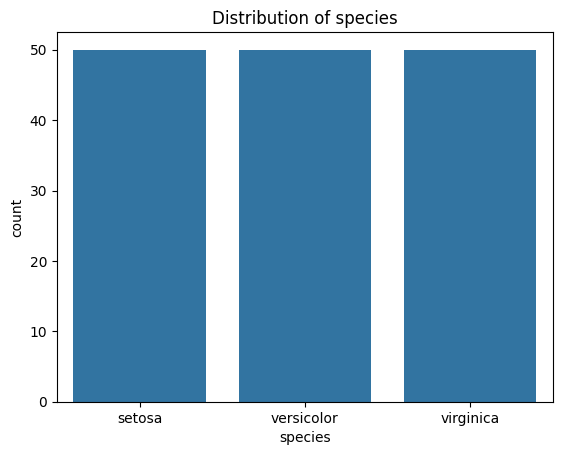

In [6]:
# Value counts for one categorical column
iris_df['species'].value_counts()

# Count plots for all categorical columns
import seaborn as sns
for col in iris_df.select_dtypes(include=['object','category']).columns:
    sns.countplot(x=col, data=iris_df)
    plt.title(f'Distribution of {col}')
    plt.show()


- The dataset has three species: setosa, versicolor, and virginica.  
- Each species has exactly 50 samples → perfectly balanced classes.  


## Step 6. Initial Data Transformation and Feature Engineering
Here we will clean and transform the dataset, then add a new feature.


## Step 6. Initial Data Transformation & Feature Engineering


In [7]:
# Rename a column for clarity
iris_df.rename(columns={'sepal_length': 'Sepal Length'}, inplace=True)

# Add a new feature (example)
iris_df['Sepal Area'] = iris_df['Sepal Length'] * iris_df['sepal_width']

# Hygiene (only if needed)
iris_df = iris_df.drop_duplicates()
iris_df.fillna(iris_df.median(numeric_only=True), inplace=True)

iris_df.head()


,Sepal Length,sepal_width,petal_length,petal_width,species,Sepal Area
0,5.1,3.5,1.4,0.2,setosa,17.85
1,4.9,3.0,1.4,0.2,setosa,14.70
2,4.7,3.2,1.3,0.2,setosa,15.04
3,4.6,3.1,1.5,0.2,setosa,14.26
4,5.0,3.6,1.4,0.2,setosa,18.00


- Renamed `sepal_length` → `Sepal Length` for clarity.  
- Added new feature `Sepal Area` (length × width).  
- No missing values or duplicates were found.  


## Step 7. Initial Visualizations
We will use pairplots and scatterplots to visualize feature relationships.


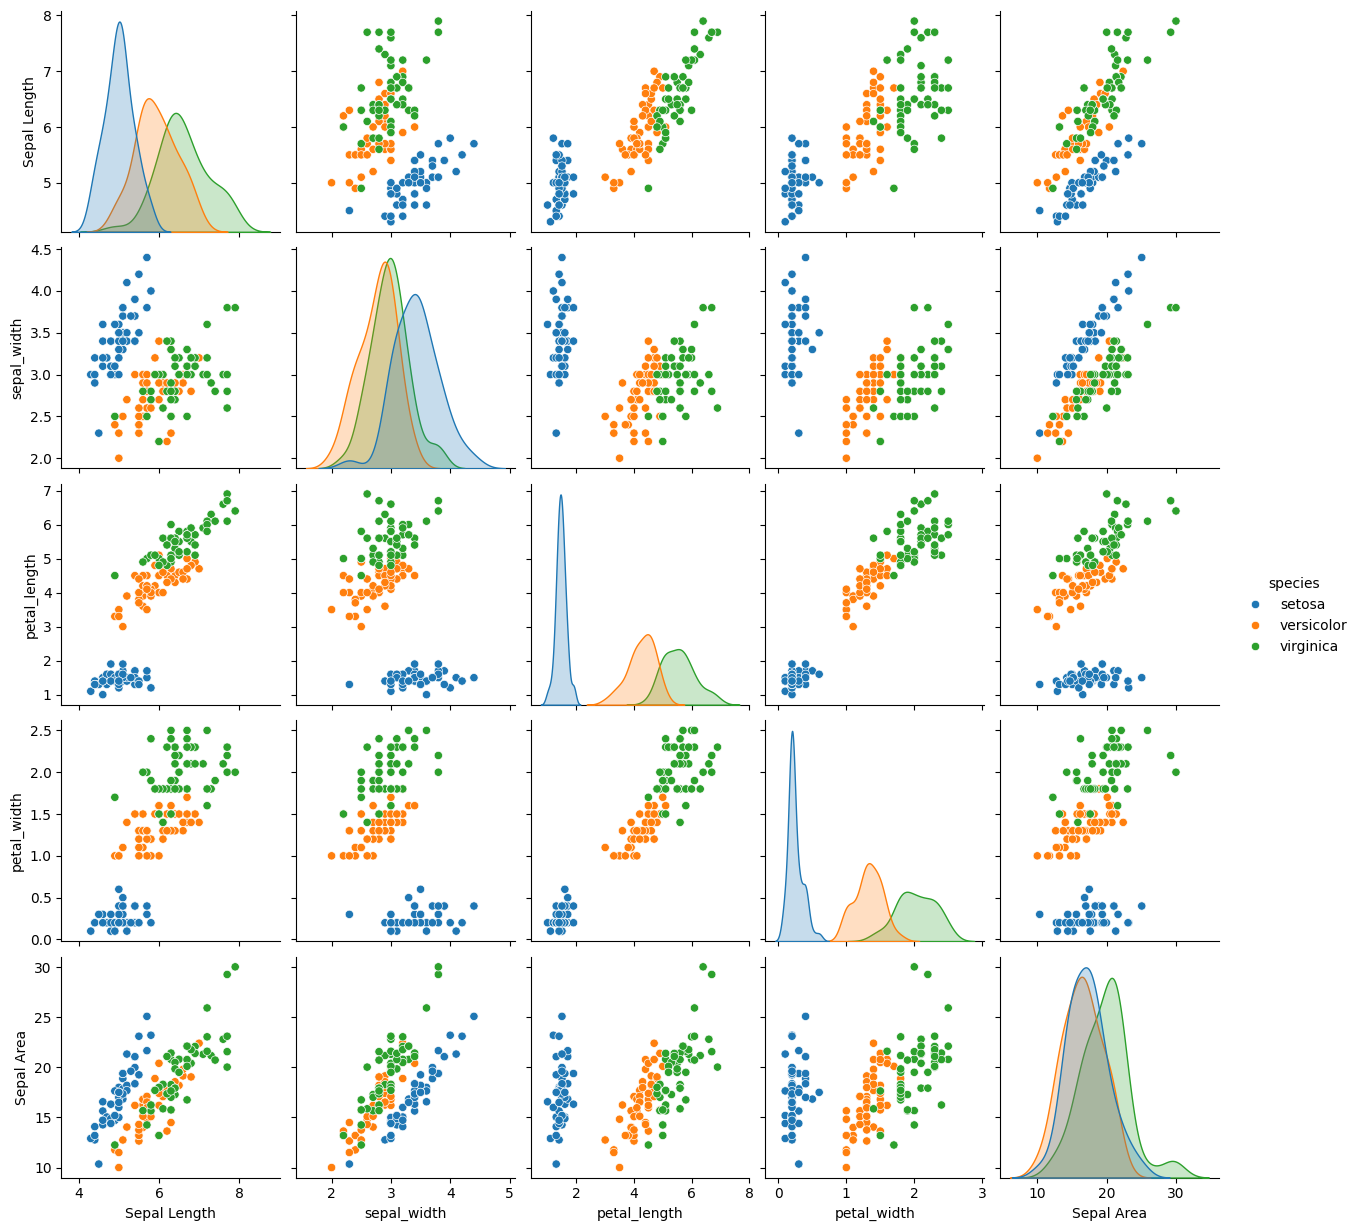

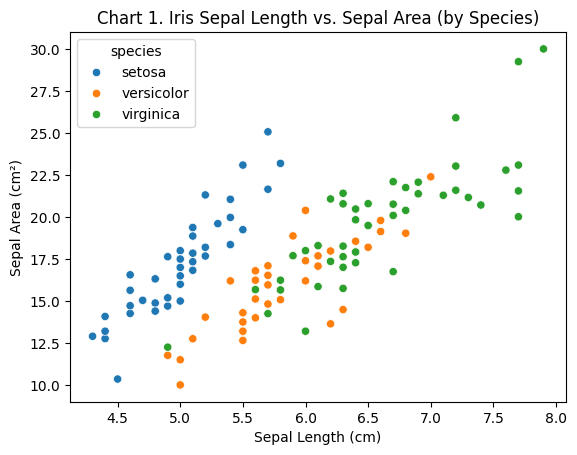

In [8]:
# Pairplot across numeric features, colored by species
sns.pairplot(iris_df, hue='species')
plt.show()

# Scatter plot with engineered feature
scatter_plt = sns.scatterplot(
    data=iris_df, x="Sepal Length", y="Sepal Area", hue="species"
)
scatter_plt.set_xlabel("Sepal Length (cm)")
scatter_plt.set_ylabel("Sepal Area (cm²)")
scatter_plt.set_title("Chart 1. Iris Sepal Length vs. Sepal Area (by Species)")
plt.show()


- Pairplot shows clear separation of species by petal dimensions.  
- Scatterplot shows a strong correlation between Sepal Length and Sepal Area, with species clusters.  


## Step 8. Initial Insights

- Petal measurements (length and width) provide the clearest separation between species.  
- Sepal measurements overlap more, but `Sepal Area` adds useful variation.  
- The dataset is clean, balanced, and ready for modeling.  


## Step 9. Storytelling & Presentation

**Executive Summary:**  
The Iris dataset is well-structured, clean, and balanced. Exploratory analysis shows that petal length and width are the strongest features for distinguishing between species, while engineered features like Sepal Area add extra explanatory power.

**Next Steps:**  
Future analysis could involve classification models (e.g., logistic regression or decision trees) to test predictive accuracy using these features.

**Narrative Notes:**  
This notebook follows a structured, step-by-step EDA process, with Markdown commentary and visualizations to explain findings in plain language.  


## Section 1. Getting Started

This is a Markdown cell (not a Python cell). 
Here are a few tips to help you get started with Jupyter Notebooks:

- To run a cell, press **Ctrl+Enter** (or **Cmd+Enter** on Mac) when you're done editing the cell.
- You can change the type of a cell (e.g., code or markdown) by looking in the lower left corner of the notebook interface.
- You can rearrange cells by dragging and dropping them within the notebook.
- After creating a new notebook, use **File > Save as** to rename and save it into your repository folder.
- To select a kernel (Python environment) for your notebook in Visual Studio Code, click on the **Select Kernel** name in the top-right corner of the notebook interface and choose the desired kernel from the dropdown menu. Follow suggestions to install recommended extensions. Once installed, click Select Kernel / Python Environments and choose the Recommended `.venv` option we created earlier. This will create a new kernel for the notebook and allow you to run code in the notebook using the packages installed in the virtual environment.


## Section 2. Imports

This is a Markdown cell. 

In [9]:
# Imports still go at the top. This is a Python cell.

# Import from external packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import ipywidgets  # interactive widgets
import IPython  # used for display of widgets

# Type hint for Axes object (basic plot type returned by Seaborn)
# A seaborn plot is a set of axes and you can set the title, labels, etc. on the axes.
from matplotlib.axes import Axes

# A figure can contain multiple axes (plots)
# from matplotlib.figure import Figure

## Section 3. Load and Explore Seaborn Penguins Dataset

This is a Markdown cell.

In [10]:
# This cell is Python, so we can write Python code here.......

# Load the penguins dataset from Seaborn
# Into a pandas DataFrame (table)
penguins_df: pd.DataFrame = sns.load_dataset("penguins")

# Show a few lines from the start of the dataset
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Section 4. Create a Seaborn Scatter Plot

A scatter plot is used to visualize the relationship between two numerical variables. 
This is a Markdown cell. 

Text(0.5, 1.0, 'Chart 1. Penguin Flipper Length vs. Body Mass (by Species)')

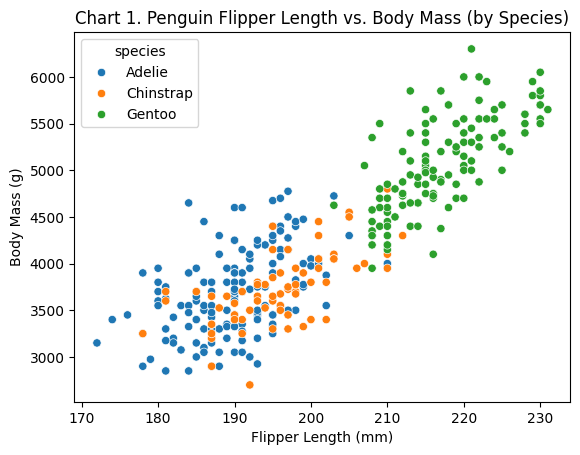

In [11]:
# This cell is Python too - previous cells must be run first

# Create a scatter plot of penguin flipper length vs. body mass
# We need to know our dataset column names so we can use them to set x, y, and hue (color)
scatter_plt: Axes = sns.scatterplot(
    data=penguins_df, x="flipper_length_mm", y="body_mass_g", hue="species"
)

# Set axis labels using the Matplotlib Axes methods set_xlabel() and set_ylabel()
scatter_plt.set_xlabel("Flipper Length (mm)")
scatter_plt.set_ylabel("Body Mass (g)")

# Set the title using the Matplotlib Axes set_title() method
scatter_plt.set_title("Chart 1. Penguin Flipper Length vs. Body Mass (by Species)")

# Run this cell by clicking the play button (Execute cell and below) in the cell toolbar
# Or by pressing Shift+Enter
# or by clicking Run All in the Menu above

## Section 5. Create a Seaborn Bar Plot

A bar plot is used to show the relationship between a numerical variable and a categorical variable.
This is a markdown cell.

Text(0.5, 1.0, 'Chart 2. Sales by Category')

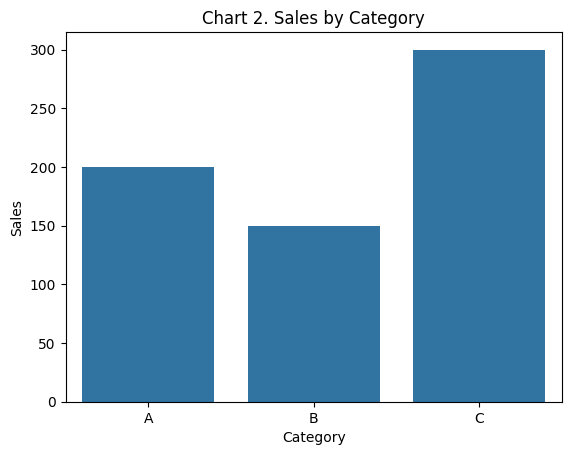

In [12]:
# This is a Python cell
# Specify some sales data as a Python dictionary
sales_data_dict: dict = {"Category": ["A", "B", "C"], "Sales": [200, 150, 300]}

# Create a pandas DataFrame from the dictionary
sales_df: pd.DataFrame = pd.DataFrame(sales_data_dict)

# Create a Seaborn Bar Plot of Sales by Category
sales_plt: Axes = sns.barplot(x="Category", y="Sales", data=sales_df)

# Set the title using the Matplotlib Pyplot title() method
sales_plt.set_title("Chart 2. Sales by Category")

## Section 6. Create an Interactive Widget with ipywidgets

Add sliders, dropdowns, or interactive inputs to make the notebook dynamic.
This is a Markdown cell. 

In [13]:
# This is a Python cell.
# All imports appear once at the top of the notebook.

# Generate sample data (e.g., heights in centimeters)
# For reproducibility always set the random seed to the same value
np.random.seed(42)

# Generate 1000 random samples from a normal distribution
# with a mean of 170 and standard deviation of 10 and store in a NumPy array
sample_data_array = np.random.normal(loc=170, scale=10, size=1000)

# Create an interactive ipywidgets Integer Slider for the number of bins
bins_slider = ipywidgets.IntSlider(
    value=10,  # Default value
    min=5,  # Minimum number of bins
    max=50,  # Maximum number of bins
    step=1,  # Step size
    description="Bins:",
)

# Function to create a histogram with a default bin number of 10
def plot_histogram(count_of_bins: int = 10):
    """
    Plots a histogram of the sample data with the given number of bins.

    Args:
        bins (int): Number of bins for the histogram.
    """
    # Create a figure and axis
    fig, ax = matplotlib.pyplot.subplots(figsize=(8, 5))
    
    # Plot the histogram (call the axes.hist() method)
    ax.hist(sample_data_array, bins=count_of_bins, color="skyblue", edgecolor="black")
    
    # Set titles and labels for this axis
    ax.set_title("Chart 3. Interactive Histogram (use slider to change number of bins)")
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")
    
    # Add grid lines
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    
    # Display the plot - not needed in a notebook 
    # Call this only if using this code in a script
    # ax.show()


# Use ipywidgets to link the slider to the plot_histogram function
interactive_hist = ipywidgets.interactive(plot_histogram, bins=bins_slider)

# Display the interactive plot
IPython.display.display(interactive_hist)

interactive(children=(IntSlider(value=10, description='count_of_bins', max=30, min=-10), Output()), _dom_class…

## Section 7. Reminder: Run All before sending to GitHub

Before committing a notebook, use 'Run All' to generate all outputs and display them in the notebook. 
This is a Markdown cell.
